In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mbti = pd.read_csv('data/train.csv')

# List of mbti types 
type_labels = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 
               'ISTP', 'ISFP', 'INFP', 'INTP', 
               'ESTP', 'ESFP', 'ENFP', 'ENTP', 
               'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']

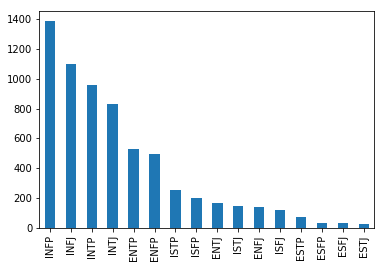

In [3]:
mbti['type'].value_counts().plot(kind = 'bar')


Lets increase the size of the dataset by converting each of the 50 posts into the `posts` column into its own row.

In [4]:

all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [7]:
print(f"before:  {mbti.shape} \nafter: {all_mbti.shape}")

before:  (6506, 2) 
after: (316548, 2)


In [21]:
pd.concat([mbti['type'].value_counts().to_frame(name='before'), all_mbti['type'].value_counts().to_frame(name='after')],axis=1)

,before,after
ENFJ,143,6947
ENFP,496,23925
ENTJ,167,8174
ENTP,530,26017
ESFJ,35,1668
ESFP,36,1663
ESTJ,30,1495
ESTP,71,3437
INFJ,1100,53807
INFP,1386,67846


### Note: find out sampling with replacement

---
## Sklearn pipeline
```
imports

steps= [('count_vec','CountVectorizer()),
        ('SVM', SVM())]
       
pipeline= Pipeline(steps)

parameters = {'SVM__C': [1,10,100],
              'SVM__gamma': [0.1,0.01]}
              
train, test split

cv = GrisSearchCV(pipeline,parameters) #default cv=5

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

"best params" cv.best_params_

"Accuracy" cv.score(X_test,y_test)

classification_report(y_test,y_pred)
```

### Imports

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

note: tweak count_vec settings

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

note: not sure, need to test if useful

In [ ]:
#CountVectorizer followed by TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

others: logistic, linearSVM or SGDClassifier (esp for gridsearchcv)

In [ ]:
from sklearn.pipeline import Pipeline

### Pipelines

try different classifyers

In [ ]:
# baseline
pipe1 = [('count_vec',CountVectorizer()),
         ('bayes',MultinomialNB())]

In [ ]:
# does tfidf improve score?
# note: not sure to check now or use in grid search
pipe2 = [('count_vec',CountVectorizer()),
         ('tfidf',TfidfTransformer)
         ('bayes',MultinomialNB())]

### GridSearch best params 

In [ ]:
params = {count_vec__
}